# **Importing Modules and Libraries**

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Reading Dataset**

In [48]:
data=pd.read_csv('/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv')

# **Data Cleaning**

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [50]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [51]:
data.duplicated().sum()

125

In [52]:
data.drop_duplicates(inplace=True)

In [53]:
data.duplicated().sum()

0

In [54]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# **Apply the K-Elbow Method**

In [55]:
x = data.iloc[:, [5, 6]].values
x.shape

(12205, 2)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.p

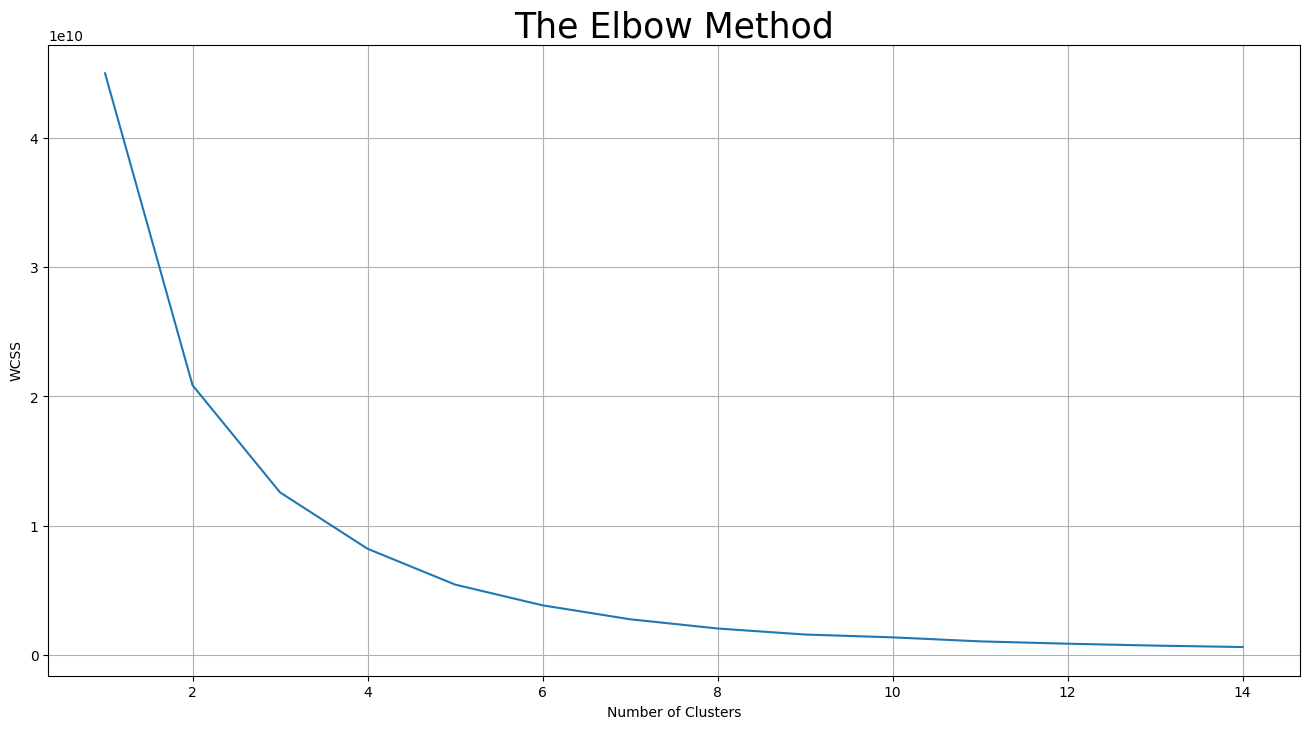

In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#calculate a value called Within-Cluster Sum of Squares
wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i,
            init='k-means++',
            max_iter=300,
            n_init=10,
            random_state=0,
            algorithm='full',
            tol=.001)
    km.fit(x)
    labels=km.labels_
    wcss.append(km.inertia_)
plt.rcParams['figure.figsize']=(13, 7)
plt.plot(range(1,15),wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# **K Means Clustering**

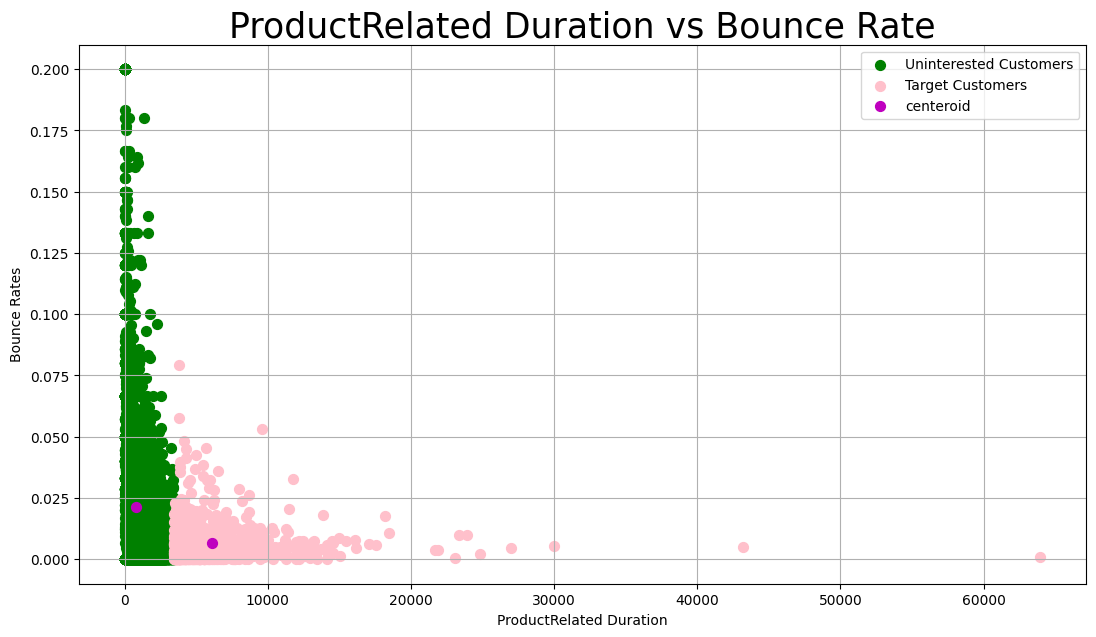

In [57]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
ymeans=km.fit_predict(x)
plt.scatter(x[y_means==0, 0],x[y_means==0, 1],s=50,c='green',label='Uninterested Customers')
plt.scatter(x[y_means==1, 0],x[y_means==1, 1],s=50,c='pink',label='Target Customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='m',label='centeroid')
plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 25)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Adjusted rand index: 
0.08248493804362389


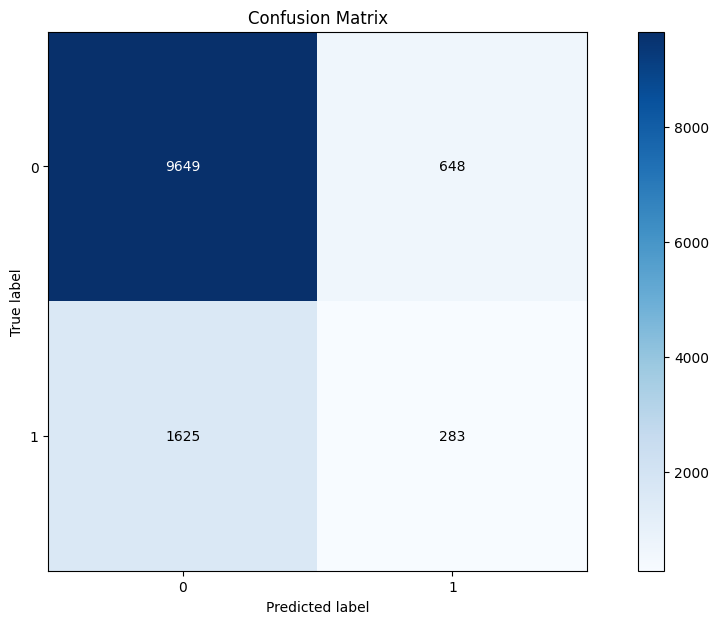

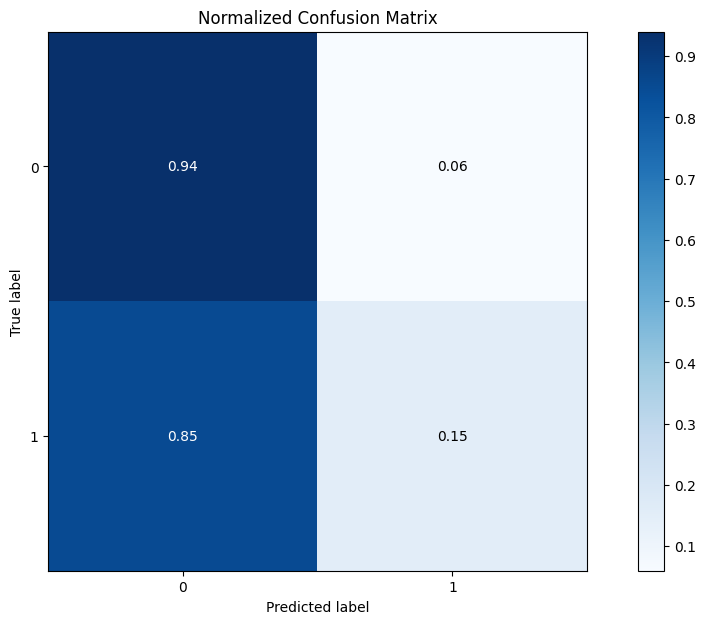

In [58]:

from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
labels_true=lab.fit_transform(data['Revenue'])

# get predicted clustering result label
labels_pred=y_means
# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score=metrics.adjusted_rand_score(labels_true,labels_pred)
print("Adjusted rand index: ")
print(score)
import scikitplot as skplt
plt_1=skplt.metrics.plot_confusion_matrix(labels_true,labels_pred,normalize=False)
plt_2=skplt.metrics.plot_confusion_matrix(labels_true,labels_pred,normalize=True)